# Project - Air Passengers Prediction By Auto Regression (Time Series in Machine Learning)

#### Importing Basic libraries

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
A=pd.read_csv('C:/Users/HP/Downloads/AirPassengers.csv')
A.head(20)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


### Changed index into time

In [3]:
A.index=pd.to_datetime(A.Month)

In [4]:
A=A.drop(labels=['Month'],axis=1)
A.head(20)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


### Visualizing Data of time series

<AxesSubplot:xlabel='Month'>

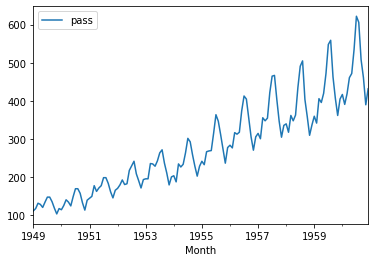

In [5]:
A.columns=['pass']
A.plot()

### Checking season,trend and residuals by decompose graph

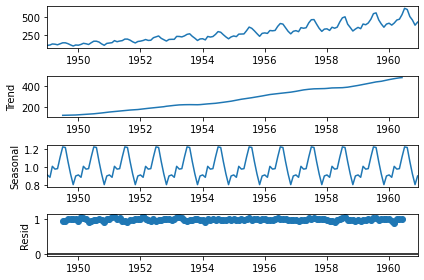

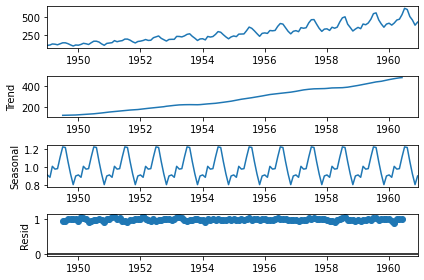

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
X1=seasonal_decompose(A,model='multiplicative')
X1.plot()

### Calculating and visualizing rolling mean 

<Figure size 5040x2880 with 0 Axes>

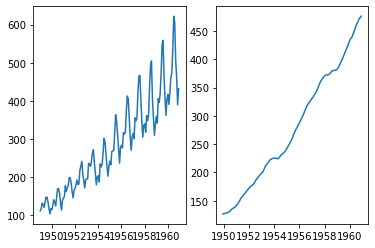

<Figure size 5040x2880 with 0 Axes>

In [7]:
RM_A=A.rolling(window=12).mean()
plt.subplot(1,2,1)
plt.plot(A)
plt.subplot(1,2,2)
plt.plot(RM_A)
plt.figure(figsize=(70,40))

### Calculations for constant mean and stationary data

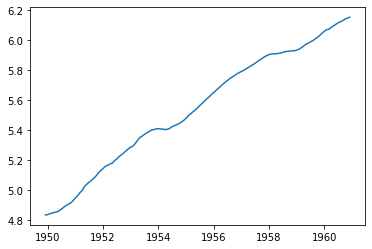

In [8]:
#same we can calculate std by std()
#now we have to change magnitute to smaller because we want constant mean or std
#first we use log
from numpy import log
LOG_A=log(A)
RM_LOG_A=LOG_A.rolling(window=12).mean()
plt.plot(RM_LOG_A)

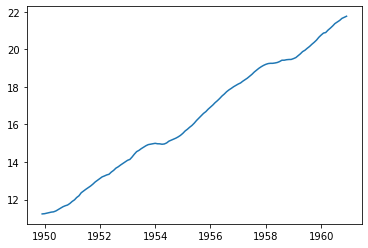

In [9]:
#we decreased the magnitute but we didnot get constant mean
#now we can use sqre root 3rd root,4th root......
from numpy import sqrt
SQ_A=sqrt(A)
RM_SQ_A=SQ_A.rolling(window=12).mean()
plt.plot(RM_SQ_A)

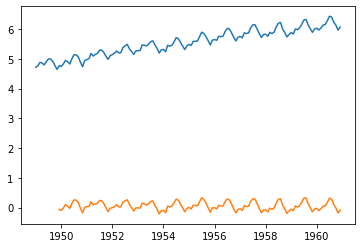

In [10]:
#still we didnot found Stationary time series
#now we can calculate diffrence between log and rolling mean og log
plt.plot(LOG_A)
plt.plot(LOG_A-RM_LOG_A)



In [11]:
#we found stationary time series
TS_NEW=LOG_A-RM_LOG_A
TS_NEW.head(20)

,pass
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


#### first we have to discart the null values

In [12]:
TS_NEW=TS_NEW[TS_NEW['pass'].isna()==False]
TS_NEW.shape

(133, 1)

In [13]:
#i have 133 columns so i have to change that into X and Y
trd=TS_NEW[0:106]
tsd=TS_NEW[106:134]
trd.head(20)

,pass
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [14]:
tsd.head(20)

,pass
Month,
1958-10-01,-0.045657
1958-11-01,-0.193762
1958-12-01,-0.110499
1959-01-01,-0.049241
1959-02-01,-0.106598
1959-03-01,0.055385
1959-04-01,0.019679
1959-05-01,0.066365
1959-06-01,0.176286


## Auto-Regression

In [15]:
#now we use auto regression model
from statsmodels.tsa.ar_model import AR
model=AR(trd).fit()
pred=model.predict(start='1958-10-01',end='1960-12-01')

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


### Visualizing output data

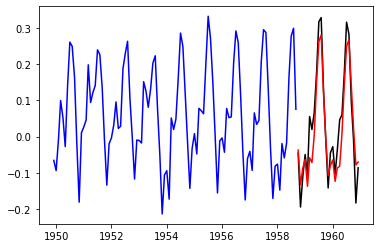

In [16]:
plt.plot(trd,c='blue')
plt.plot(tsd,c='black')
plt.plot(pred,c='red')

In [17]:
#now we want data in original format
from numpy import exp
exp(pred+RM_LOG_A.tail(27)['pass'])

1958-10-01    362.074874
1958-11-01    329.665472
1958-12-01    345.022132
1959-01-01    355.254891
1959-02-01    331.825018
1959-03-01    362.397462
1959-04-01    361.557750
1959-05-01    394.308061
1959-06-01    459.595119
1959-07-01    518.826980
1959-08-01    532.924005
1959-09-01    457.780063
1959-10-01    409.016492
1959-11-01    374.566527
1959-12-01    391.212539
1960-01-01    402.030491
1960-02-01    383.279617
1960-03-01    398.643488
1960-04-01    405.564367
1960-05-01    447.378802
1960-06-01    517.934425
1960-07-01    582.144687
1960-08-01    596.448665
1960-09-01    531.518149
1960-10-01    476.412618
1960-11-01    433.080844
1960-12-01    439.005306
Freq: MS, dtype: float64

In [18]:
#rolling mean also can be forecast